In [4]:
#Imports

import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as si
import scipy.optimize as so
import scipy.special as ss

In [9]:
#Parameters

#Constants
n = 2.7                                     #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
re = 2.6                                    #1kpc
L = 3.27e10                                 #luminosity
G = 4.300e-6                                #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 2.8                                   #mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                    #intrinsic axis ratio
i = 45*(np.pi/180)                          #inclination angle

#Gamma Function
f = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(f,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations

#Inner Function
f = lambda x,m: np.exp(-np.power(x/r0, (1/n)))*np.power(x/r0, 1/n-1)/(np.sqrt(x**2-m**2))
#Integrate Inner Function
g = lambda m: si.quad(f, m, np.inf,args=(m,))[0]
gv = np.vectorize(g)

I0 = L*root**(2*n)/(re**2*2*np.pi*n*ss.gamma(2*n))
r0 = re/root**n

#Variables
x = np.linspace(1, 10, 100)                 #x from/to and line smoothness

#Print Desired Values
print("r0:",r0,"[kpc]")
print("bn:",root)
print("I0:",I0)
print("Gamma Function Integral at m=10:",gv(10))

r0: 0.032457790309459424 [kpc]
bn: 5.070574690730433
I0: 41024432058.25408
Gamma Function Integral at m=10: 4.288869461420851e-06


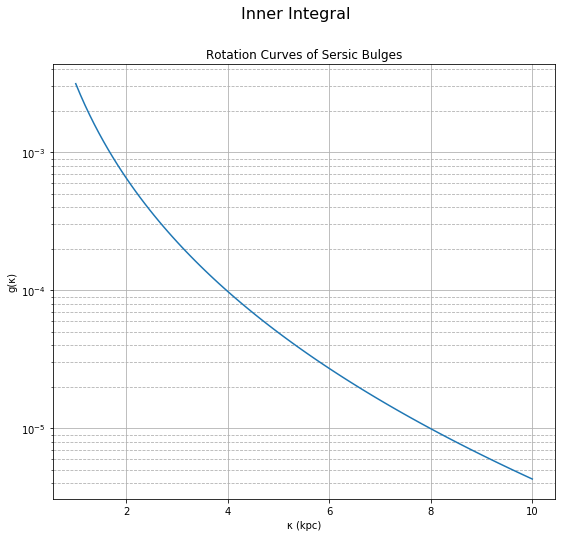

In [7]:
#plotting inner integral
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')

#curves
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

#labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

In [4]:
#equations
C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)

#plot range
x = np.linspace(0.001, 19, 200)

#integrate outer function
h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))

#hr = lambda m: h(m,r) #Never called
def y(r):
    return si.quad(h, 0, r, args=(r,))[0]
yv = np.vectorize(y)

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


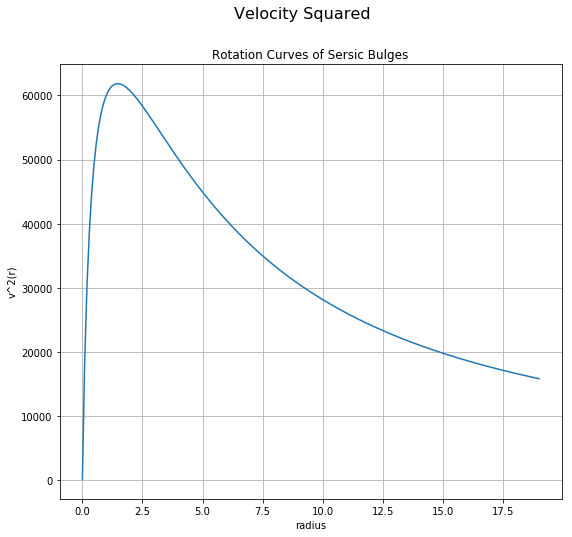

In [5]:
#Plotting Velocity Squared Function
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

v2 = yv(x)
plt.plot(x, v2, linestyle='solid', label='Velocity Squared')

#labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

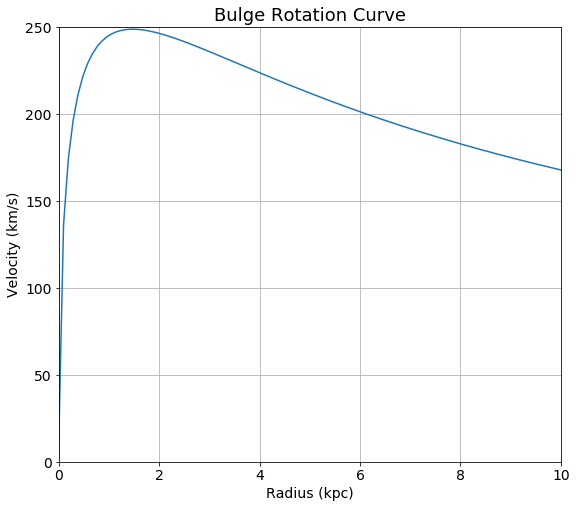

In [6]:
#Bulge Velocity Curve

#equation
vb = np.sqrt(v2)

#Plotting
fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(x, vb, linestyle='solid', label='Velocity(r)')          

ax3.set_title('Bulge Rotation Curve', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Velocity (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.axis([0,10,0,250])

plt.savefig('Outputs/Plot1_n4.png')